In [2]:
import warnings
warnings.filterwarnings("ignore")

from utils import *
from richutils import get_significant_acf, get_significant_pacf 
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, root_mean_squared_error


In [3]:
df = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True,date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))

production = df['Production']
withdrawals = df['Withdrawals']
globalPrice = df['GlobalPrice']
exchangeRate = df['ExchangeRate']
temperature = df['TempMax']
precipitation = df['Precipitation']

In [4]:
def HoltWintersModel(train, test, seasonal_periods, trend='add', seasonal='add'):
    model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    forecast = model_fit.forecast(len(test))
    return forecast

def Evaulate_HW(true, pred):
    mape = mean_absolute_percentage_error(true, pred)
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = root_mean_squared_error(true, pred)
    
    print(f'MAPE: {mape:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')

def HoltWintersForecast(df,months, seasonal_periods, trend='add', seasonal='add'):
    model = ExponentialSmoothing(df, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    forecast = model_fit.forecast(months)
    return forecast

def HWForecast_plot(actual, forecast):
    forecast.plot(label='Forecast', color='red')
    actual.plot(label='Actual', color='blue')
    plt.legend()
    

# Production

<Axes: xlabel='Month'>

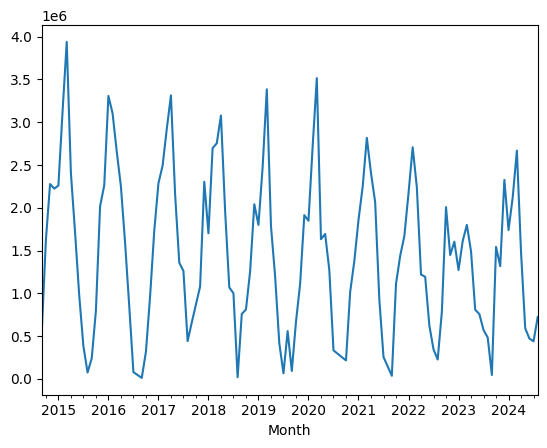

In [5]:
production.plot()

P-value: 2.9231354145461644e-15 < 0.05
The time series is stationary


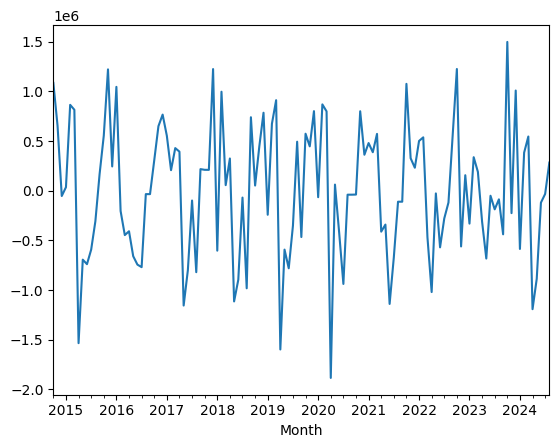

In [6]:
Differencing(production, 1)

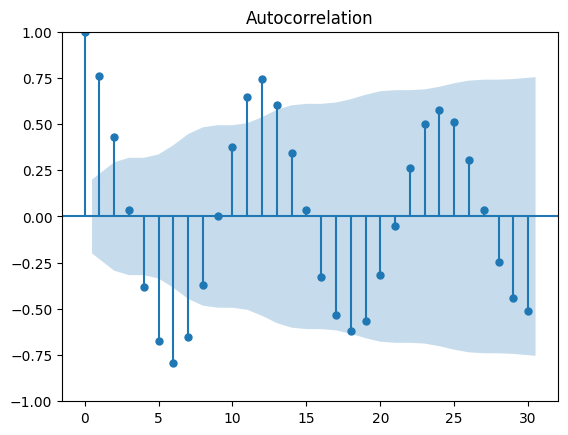

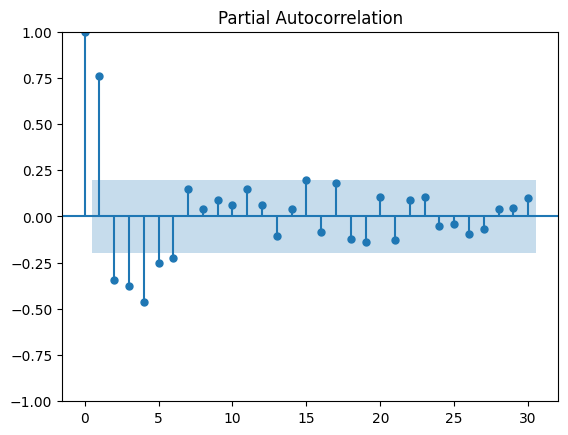

In [7]:
prod_train, prod_test = train_test_split(production, 24)

ACF_PACF(prod_train, lags=30)

In [8]:
pred = HoltWintersModel(prod_train, prod_test, seasonal_periods=12, trend='add', seasonal='add')
Evaulate_HW(prod_test, pred)

MAPE: 0.5829
MAE: 564924.7588
MSE: 479448385020.2321
RMSE: 692422.1148


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


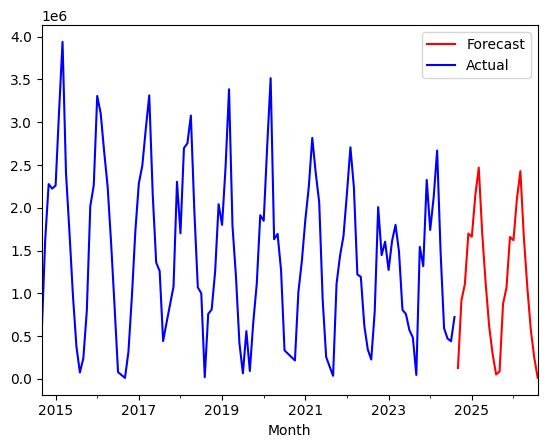

In [9]:
forecastX = HoltWintersForecast(production, 24, seasonal_periods=12, trend='add', seasonal='add')
HWForecast_plot(production, forecastX)


In [10]:
p = get_significant_pacf(prod_train)
q = get_significant_acf(prod_train)
print(f"p: {p}, q: {q}")

p: [1, 2, 3, 4, 5, 6, 11, 15, 17, 19], q: [1, 2, 4, 5, 6, 7, 11, 12, 13]


In [11]:
all_results,mape,aic,bic = Eval_possible_models(prod_train,prod_test,[1,2,3,4,5],[1],[1,2,4,5,6,7])

C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\ts

In [12]:
aic

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
14,ARIMA,"(3, 1, 4)",4.959081e+11,704207.431544,590917.354304,55.184454,2746.933457,2767.364472
20,ARIMA,"(4, 1, 4)",4.427373e+11,665385.071499,565574.649949,55.593518,2747.167964,2770.152856
9,ARIMA,"(2, 1, 5)",4.538961e+11,673718.080771,564267.835038,55.704089,2748.234225,2768.665240


In [13]:
mape

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
23,ARIMA,"(4, 1, 7)",4.424899e+11,665199.167319,564222.334276,52.758039,2752.897682,2783.544205
14,ARIMA,"(3, 1, 4)",4.959081e+11,704207.431544,590917.354304,55.184454,2746.933457,2767.364472
11,ARIMA,"(2, 1, 7)",4.259509e+11,652649.118369,548942.744199,55.552412,2758.855807,2784.394576


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


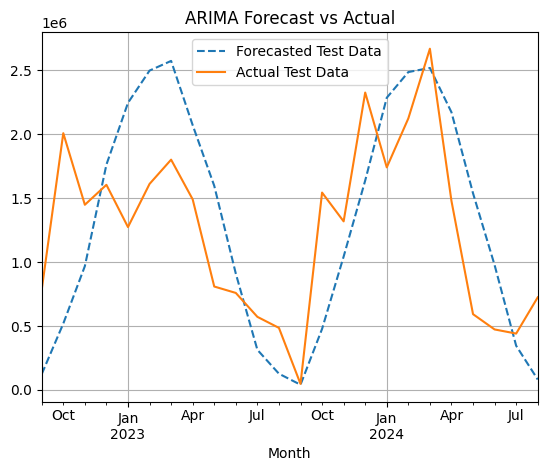

In [14]:
model = Model(prod_train, prod_test, (4,1,7))

C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


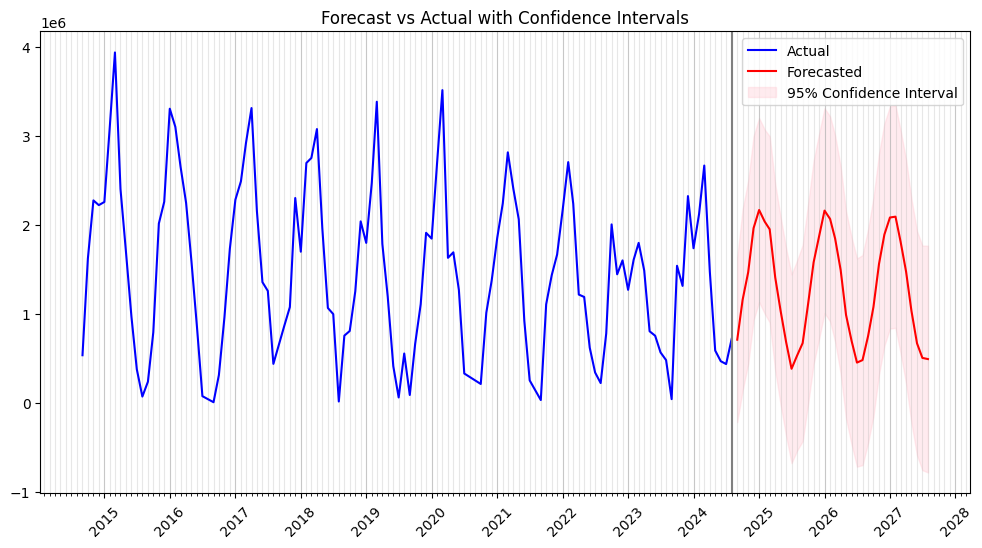

In [15]:
months = 12*3
forecast, model = Forecast(production, (4,1,7), months)
confindence = Confidence_intervals(model, months)
Forecasted_plot(production, forecast, confindence.values)

# Withdrawal

<Axes: xlabel='Month'>

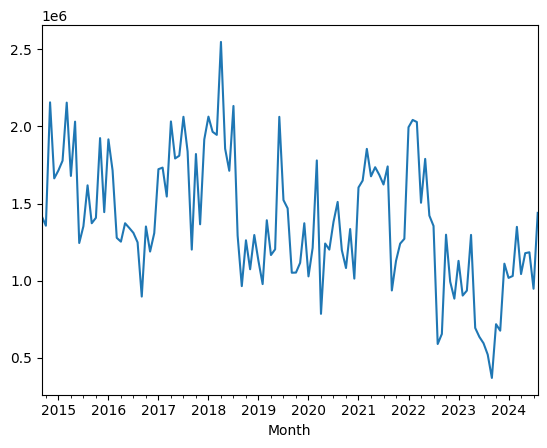

In [16]:
withdrawals.plot()

In [17]:
with_train, with_test = train_test_split(withdrawals, 24)
p = get_significant_pacf(with_train)
q = get_significant_acf(with_train)
print(f"p: {p}, q: {q}")

p: [1, 2, 13, 16], q: [1, 2, 3]


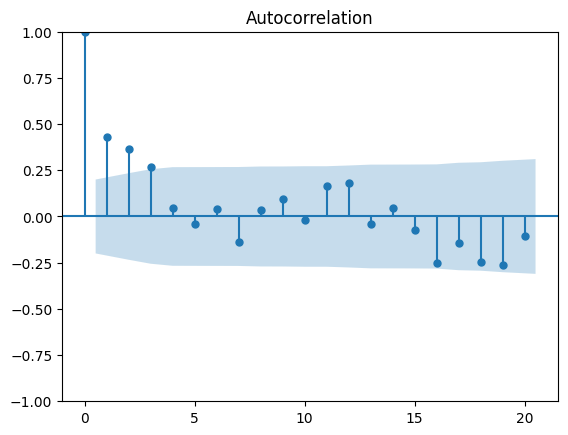

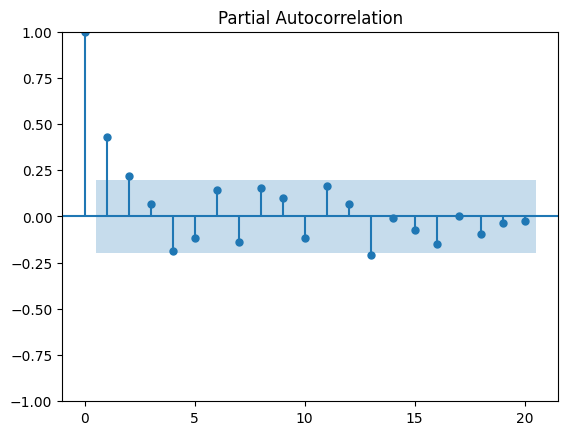

In [18]:
ACF_PACF(with_train,20)

In [19]:
a,b,c,d = Eval_possible_models(with_train, with_test,[1,2,13,16],[1],[1,2,3])

C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\ts

In [20]:
b

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
5,ARIMA,"(2, 1, 3)",9.555394e+10,309118.003885,261895.312121,29.002415,2692.009146,2707.332408
0,ARIMA,"(1, 1, 1)",8.895346e+10,298250.668792,258575.473132,30.337739,2700.119174,2707.780805
3,ARIMA,"(2, 1, 1)",9.094605e+10,301572.635015,262215.640863,30.388970,2701.852072,2712.067579


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


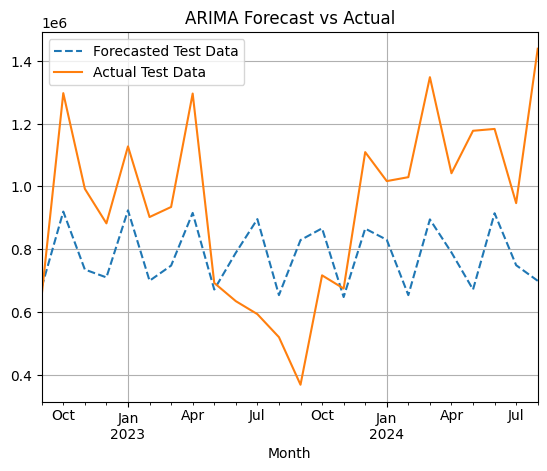

In [21]:
model = Model(with_train, with_test, (2,1,3))

C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


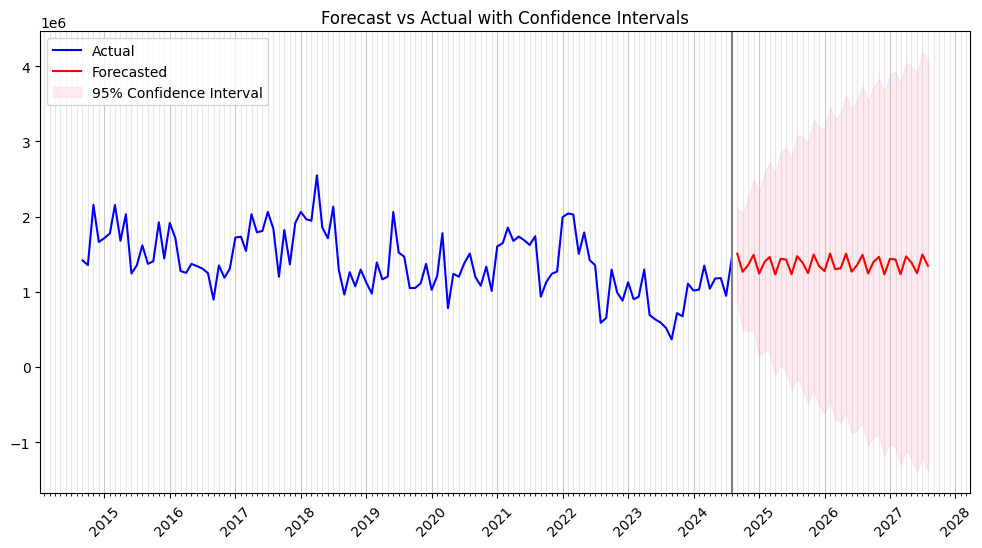

In [22]:
forecast, model = Forecast(withdrawals, (2,1,3), 36)
confindence = Confidence_intervals(model, 36)
Forecasted_plot(withdrawals, forecast, confindence.values)

# Global Price

In [23]:
gPrice_train, gPrice_test = train_test_split(globalPrice, 24)
p = get_significant_pacf(gPrice_train)
q = get_significant_acf(gPrice_train)
print(f"p: {p}, q: {q}")

a,b,c,d = Eval_possible_models(gPrice_train, gPrice_test, p, [1], q)

p: [1, 2, 4, 9, 19], q: [1, 2, 3, 4, 5]


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\ts

In [24]:
c


,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
7,ARIMA,"(2, 1, 3)",0.002283,0.047776,0.038158,15.949136,-593.645464,-578.322203
3,ARIMA,"(1, 1, 4)",0.002493,0.049929,0.040800,17.163085,-593.061939,-577.738677
0,ARIMA,"(1, 1, 1)",0.002392,0.048911,0.039591,16.608343,-591.393569,-583.731939


C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Franniel\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


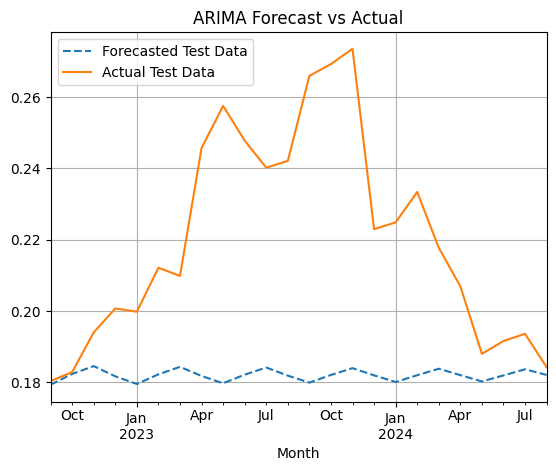

In [28]:
model,prd = Model(gPrice_train, gPrice_test, (2,1,3))

<Axes: xlabel='Month'>

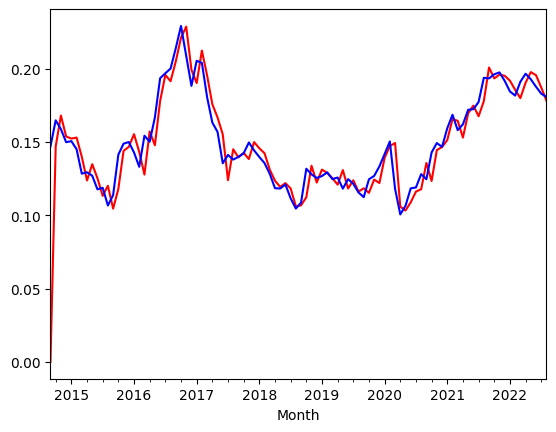

In [32]:
fitted = model.fittedvalues.plot(label='Fitted', color='red')
gPrice_train.plot(label='Actual', color='blue')


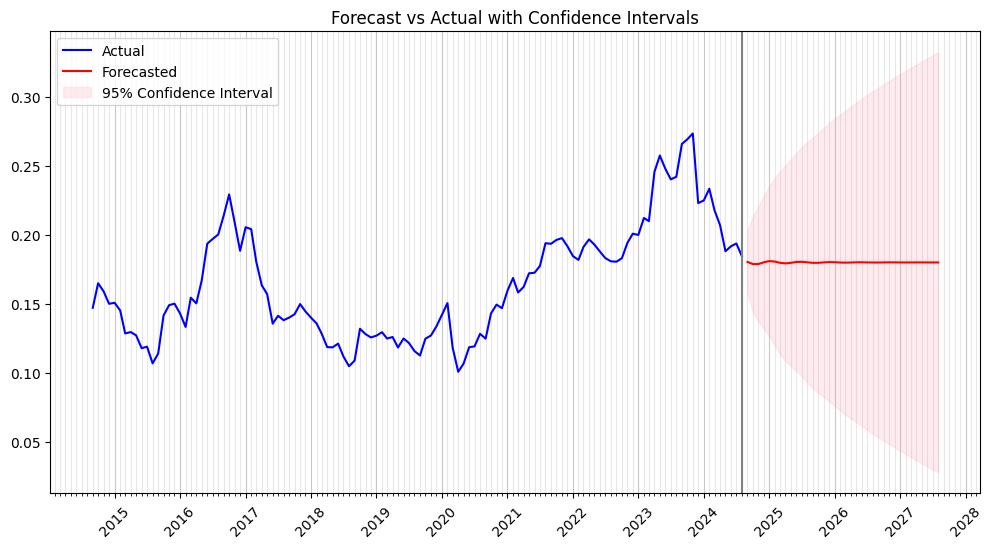

In [ ]:
forecast, model = Forecast(globalPrice, (2,1,3), 36)
confindence = Confidence_intervals(model, 36)
Forecasted_plot(globalPrice, forecast, confindence.values)

# Exchange Rate

In [ ]:
eRate_train, eRate_test = train_test_split(exchangeRate, 24)
p = get_significant_pacf(eRate_train)
q = get_significant_acf(eRate_train)
dd = [0,1]

a,b,c,d = Eval_possible_models(eRate_train, eRate_test, p, dd, q)
b

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
13,ARIMA,"(1, 1, 7)",1.694025,1.301547,1.117541,1.974983,162.010999,184.995891
7,ARIMA,"(1, 1, 1)",2.279445,1.509783,1.142170,1.991500,161.561319,169.222950
12,ARIMA,"(1, 1, 6)",1.739317,1.318832,1.137682,2.012987,160.088074,180.519089


In [ ]:
c

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
12,ARIMA,"(1, 1, 6)",1.739317,1.318832,1.137682,2.012987,160.088074,180.519089
7,ARIMA,"(1, 1, 1)",2.279445,1.509783,1.142170,1.991500,161.561319,169.222950
13,ARIMA,"(1, 1, 7)",1.694025,1.301547,1.117541,1.974983,162.010999,184.995891


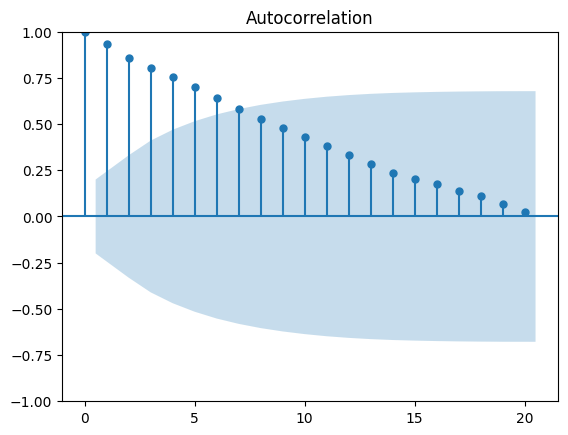

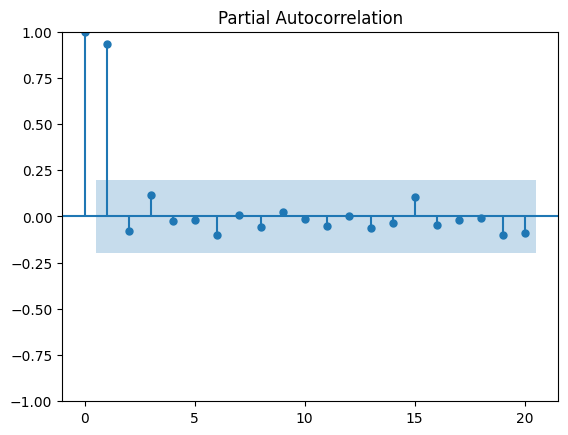

In [ ]:
ACF_PACF(eRate_train,20)

In [ ]:
Evaluate(eRate_train, eRate_test, (4,1,4))

Evaluation of ARIMA(4, 1, 4)
MSE: 35.4799
MAE: 5.5109
RMSE: 5.9565
MAPE: 9.78%
AIC: 156.75
BIC: 179.73


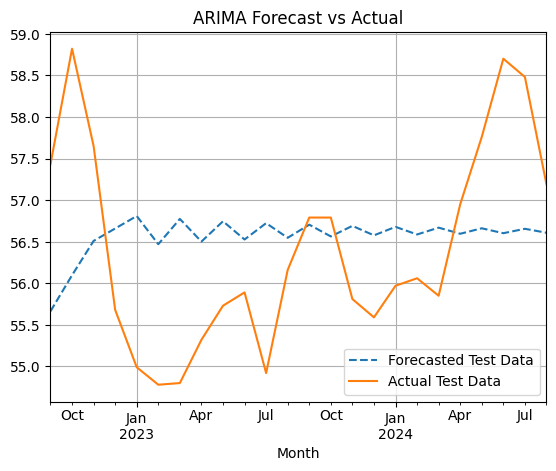

In [ ]:
model = Model(eRate_train, eRate_test, (1,1,6))

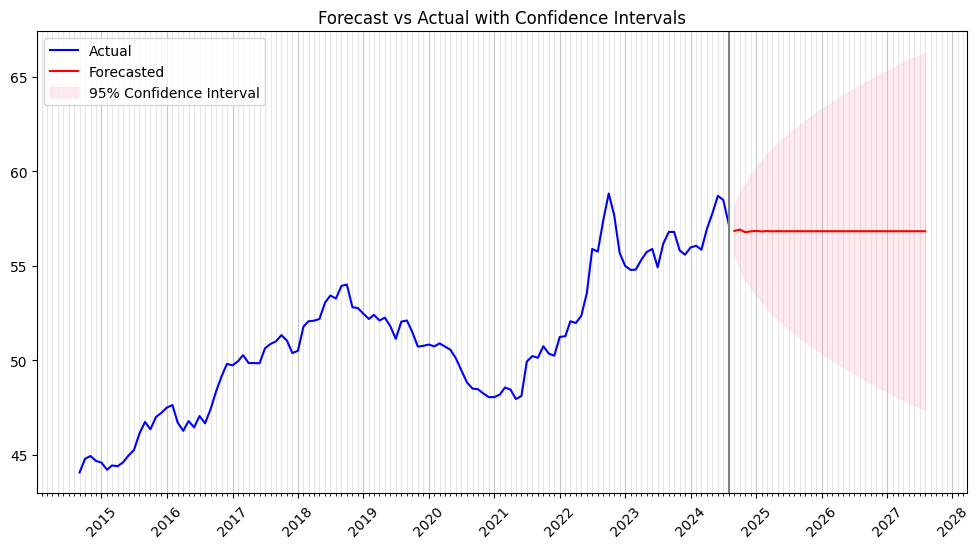

In [ ]:
forecast, model = Forecast(exchangeRate, (1,1,6), 36)
confindence = Confidence_intervals(model, 36)
Forecasted_plot(exchangeRate, forecast, confindence.values)

# Temperature

In [ ]:
temp_train, temp_test = train_test_split(temperature, 24)
p = get_significant_pacf(temp_train)
q = get_significant_acf(temp_train)
dd = [1]
a,b,c,d = Eval_possible_models(temp_train, temp_test, p, dd, q)

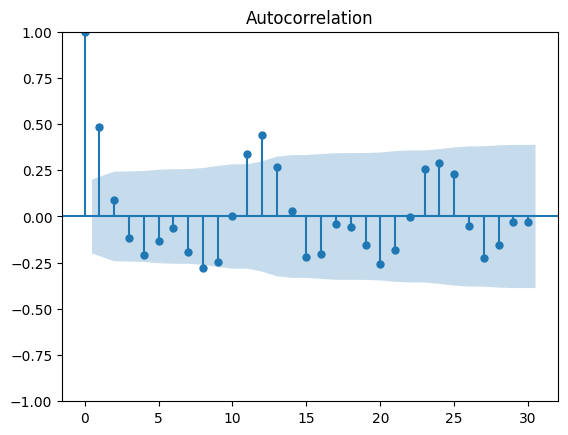

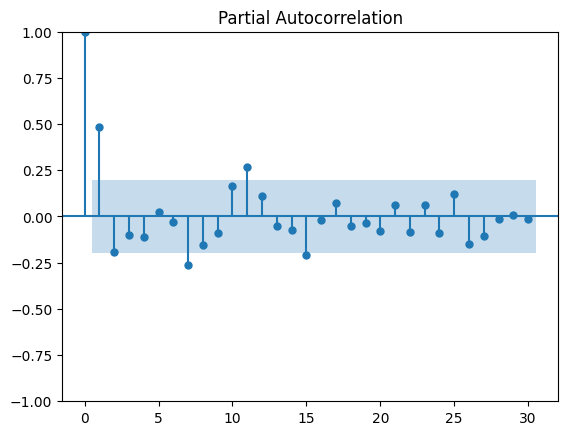

In [ ]:
ACF_PACF(temp_train, lags=30)

In [ ]:
b

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
5,ARIMA,"(7, 1, 8)",1.569000,1.252597,0.926248,3.004792,202.799191,243.661221
10,ARIMA,"(11, 1, 11)",1.369770,1.170372,0.922523,3.007850,213.533785,272.272954
13,ARIMA,"(15, 1, 8)",1.791377,1.338423,0.957264,3.100372,212.728362,274.021407


In [ ]:
c

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
5,ARIMA,"(7, 1, 8)",1.569000,1.252597,0.926248,3.004792,202.799191,243.661221
12,ARIMA,"(15, 1, 1)",1.860217,1.363898,0.981268,3.175745,207.277625,250.693532
6,ARIMA,"(7, 1, 11)",1.701645,1.304471,0.984739,3.197575,207.469399,255.993059


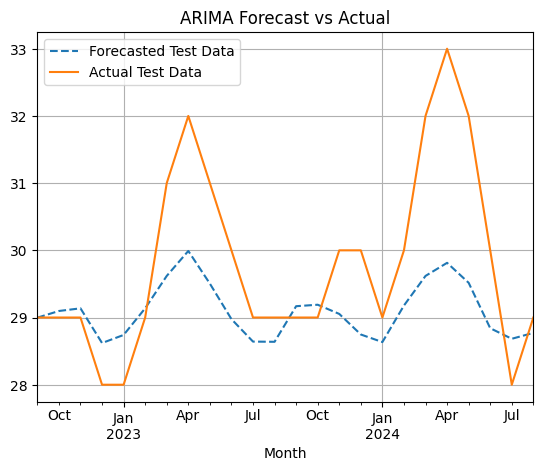

In [ ]:
model = Model(temp_train, temp_test, (7,1,8))

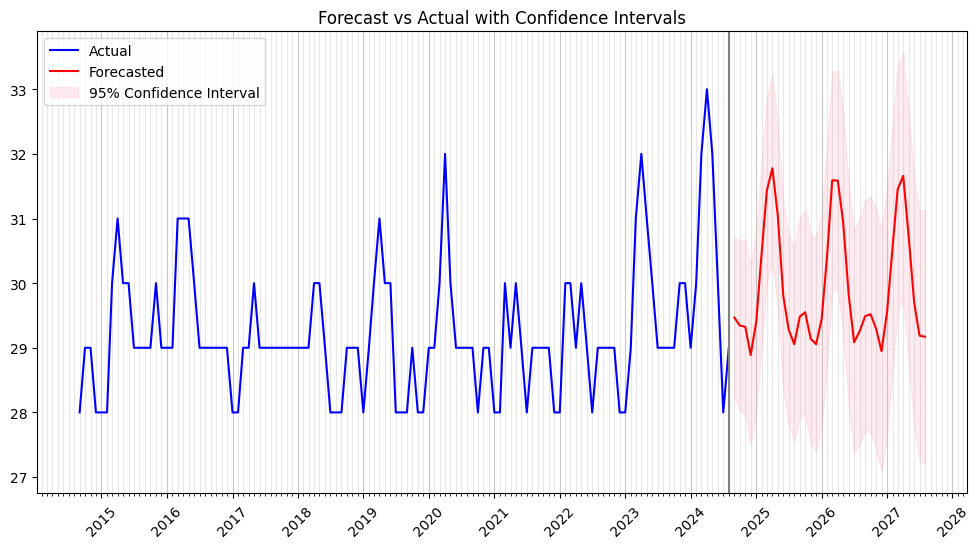

In [ ]:
forecast, model = Forecast(temperature, (7,1,8), 36)
confindence = Confidence_intervals(model, 36)
Forecasted_plot(temperature, forecast, confindence.values)

# Rainfall

<Axes: xlabel='Month'>

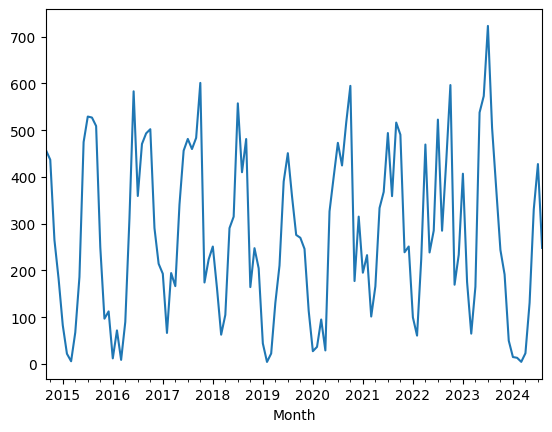

In [ ]:
precipitation.plot()

MAPE: 1.3583812984353054
MAE: 109.02075907363653
MSE: 18405.64567255937
RMSE: 135.6674082915988


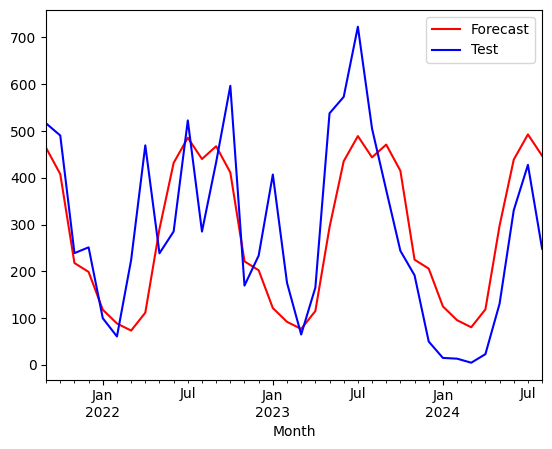

In [ ]:
# holt winters

from statsmodels.tsa.holtwinters import ExponentialSmoothing

split = 36

rain_train, rain_test = train_test_split(precipitation, split)

model = ExponentialSmoothing(rain_train, trend='add', seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(split)
forecast.plot(label='Forecast', color='red')
rain_test.plot(label='Test', color='blue')
plt.legend()

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Example usage
y_true = rain_test
y_pred = forecast
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
print(f"MAPE: {mape}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


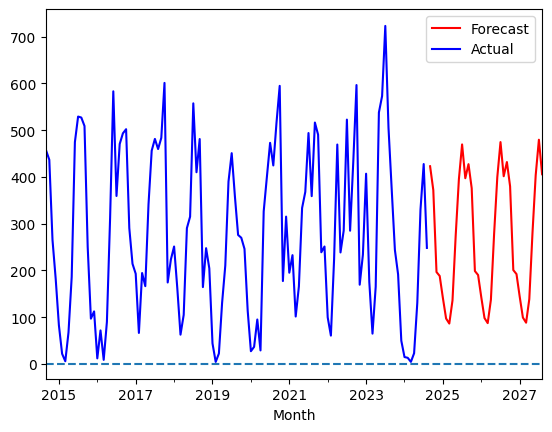

In [ ]:
final_model = ExponentialSmoothing(precipitation,trend='mul', seasonal='mul', seasonal_periods=12).fit()
forecast = final_model.forecast(36)
forecast.plot(label='Forecast', color='red')
precipitation.plot(label='Actual', color='blue')
plt.legend()
plt.axhline(y=0, linestyle='--')

In [ ]:
forecast

2022-09-01    457.783374
2022-10-01    396.567826
2022-11-01    200.003021
2022-12-01    184.500922
2023-01-01     97.512152
2023-02-01     64.352591
2023-03-01     67.826420
2023-04-01    127.730042
2023-05-01    259.360734
2023-06-01    395.923419
2023-07-01    467.559505
2023-08-01    407.699071
2023-09-01    454.909951
2023-10-01    393.694403
2023-11-01    197.129598
2023-12-01    181.627499
2024-01-01     94.638729
2024-02-01     61.479168
2024-03-01     64.952997
2024-04-01    124.856619
2024-05-01    256.487311
2024-06-01    393.049997
2024-07-01    464.686083
2024-08-01    404.825649
Freq: MS, dtype: float64